In [1]:
# 📘 AquaVision - Data Preprocessing Notebook
# Milestone 1: Dataset Preparation & Preprocessing (30% completion)

# ==============================
# STEP 1: Import Required Libraries
# ==============================
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf


In [10]:
import os
import cv2
import numpy as np

# ==============================
# STEP 2: Define Dataset Path
# ==============================
DATASET_PATH = r"C:\Users\theza\AquaTerra\data"

# ✅ Filter only directories
CLASSES = [d for d in os.listdir(DATASET_PATH) 
           if os.path.isdir(os.path.join(DATASET_PATH, d))]
print("✅ Found classes:", CLASSES)

# ==============================
# STEP 3: Load & Preprocess Images
# ==============================
IMG_SIZE = 224
X = []
y = []

for idx, label in enumerate(CLASSES):
    folder = os.path.join(DATASET_PATH, label)
    print(f"🔍 Loading images from: {folder}")
    
    for file in os.listdir(folder):
        img_path = os.path.join(folder, file)

        # Skip non-image files
        if not file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            continue

        try:
            img = cv2.imread(img_path)
            if img is None:
                print(f"⚠️ Skipped unreadable image: {img_path}")
                continue

            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            X.append(img)
            y.append(idx)
        except Exception as e:
            print(f"❌ Error processing {img_path}: {e}")

X = np.array(X, dtype=np.float32) / 255.0
y = np.array(y)

print("✅ Dataset loaded successfully!")
print("📦 Features shape:", X.shape)
print("🏷️ Labels shape:", y.shape)


✅ Found classes: ['Images']
🔍 Loading images from: C:\Users\theza\AquaVision\data\Images
✅ Dataset loaded successfully!
📦 Features shape: (369, 224, 224, 3)
🏷️ Labels shape: (369,)


In [11]:

# ==============================
# STEP 4: Train-Test Split
# ==============================
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print("✅ Train:", X_train.shape)
print("✅ Validation:", X_val.shape)
print("✅ Test:", X_test.shape)

✅ Train: (258, 224, 224, 3)
✅ Validation: (55, 224, 224, 3)
✅ Test: (56, 224, 224, 3)


In [12]:
# ==============================
# STEP 5: Save Preprocessed Data
# ==============================
np.save("X_train.npy", X_train)
np.save("y_train.npy", y_train)
np.save("X_val.npy", X_val)
np.save("y_val.npy", y_val)
np.save("X_test.npy", X_test)
np.save("y_test.npy", y_test)

print("🎯 Data preprocessing complete! Ready for model training in next milestone.")


🎯 Data preprocessing complete! Ready for model training in next milestone.


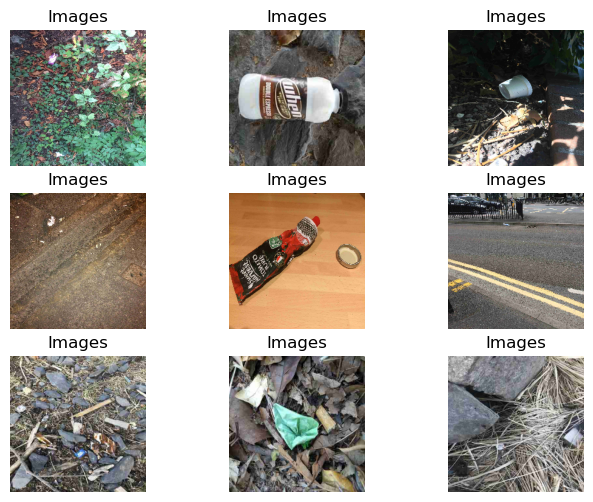

In [15]:
# ==============================
# STEP 6: Quick Visualization
# ==============================
plt.figure(figsize=(8,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i])
    plt.title(CLASSES[y_train[i]])
    plt.axis("off")
plt.show()

In [19]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [21]:

import pandas as pd

# Load the CSV file
csv_path = os.path.join(DATASET_PATH, "annotations.csv")
df = pd.read_csv(csv_path)

# Now this will work
print("✅ Unique classes:", df['class_name'].unique())

✅ Unique classes: ['metal' 'plastic' 'glass' 'paper']


Total samples: 469


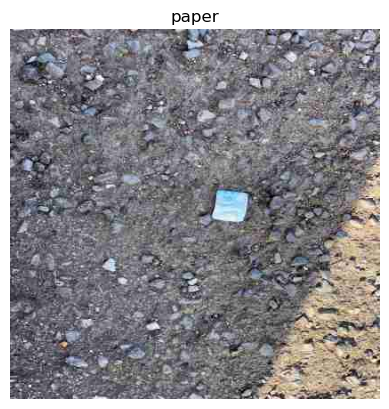

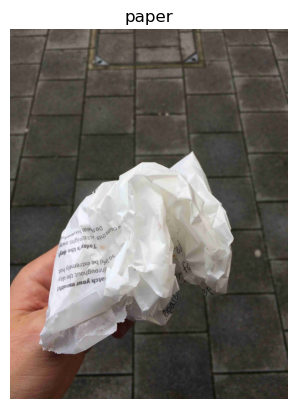

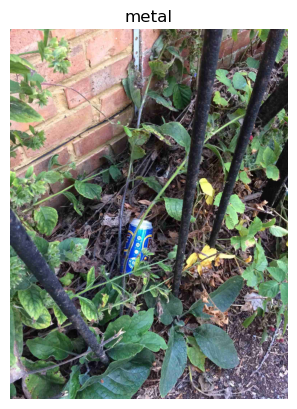

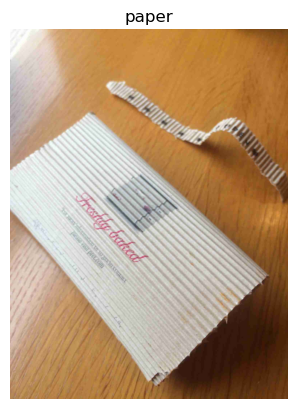

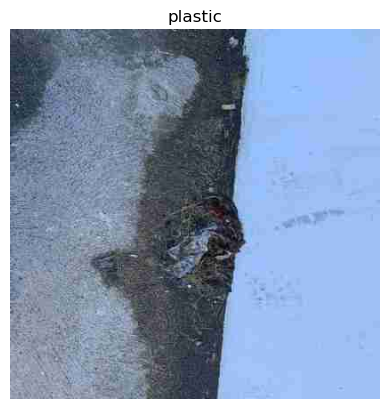

In [28]:
# Paths
data_dir = "C:/Users/theza/AquaTerra/data"
img_dir = os.path.join(data_dir, "Images")
csv_path = os.path.join(data_dir, "annotations.csv")

# Load CSV file
df = pd.read_csv(csv_path)
print("Total samples:", len(df))
df.head()

sample = df.sample(5)

for idx, row in sample.iterrows():
    # Construct image path
    img_path = os.path.join(img_dir, row['image_name'])

    # Check if image exists
    if not os.path.exists(img_path):
        print(f"Image not found: {img_path}")
        continue

    # Read the image
    img = cv2.imread(img_path)

    # Check if image was loaded successfully
    if img is None:
        print(f"Failed to load image: {img_path}")
        continue

    # Convert and display
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(row['class_name'])
    plt.axis('off')
    plt.show()


In [29]:
IMG_SIZE = 128

def preprocess_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img / 255.0
    return img


In [30]:
X = []
y = []

for idx, row in df.iterrows():
    img_path = os.path.join(img_dir, row['image_name'])  # no extra '.jpg' if already included
    if os.path.exists(img_path):
        try:
            img = preprocess_image(img_path)
            X.append(img)
            y.append(row['class_name'])
        except Exception as e:
            print(f"Error processing {img_path}: {e}")
            continue

X = np.array(X)
y = np.array(y)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (469, 128, 128, 3)
y shape: (469,)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)


Training set: (375, 128, 128, 3)
Testing set: (94, 128, 128, 3)


In [32]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)
